In [16]:
%load_ext autoreload

%autoreload 2

In [17]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import skimage
from sklearn.cluster import KMeans
import sys
sys.path.append('../')
import modules.cv_helpers as ch

(1096, 1158)


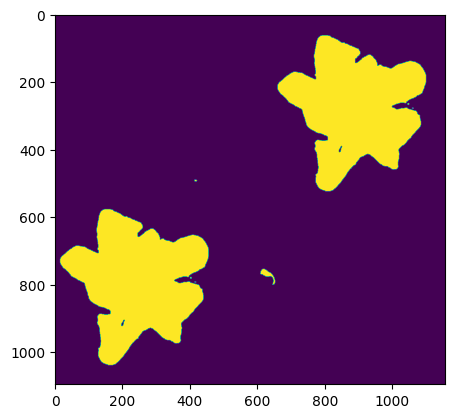

In [85]:
# Read the image
image = cv2.imread('../img/lettuce_test.png')

# # Convert the image from BGR to HSV color space
# rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# # Define the lower and upper bounds for the green color in HSV
# lower_green = np.array([30,40,30])
# upper_green = np.array([100,255,255])

# # Create a mask to isolate the green areas
# mask = cv2.inRange(rgb_image, lower_green, upper_green)

# # Apply the mask to the original image
# green_areas = cv2.bitwise_and(image, image, mask=mask)

green_areas = ch.get_green(image)

arr = ch.green_to_bnw(green_areas)
# arr = green_areas
# for i in range(arr.shape[0]):
#     for j in range(arr.shape[1]):
#         for k in range(arr.shape[2]):
#             if arr[i, j, k] != 0:
#                 arr[i, j, k] = 255

# denoised_image = cv2.fastNlMeansDenoisingColored(arr, None, h=100, templateWindowSize=7, searchWindowSize=21)
denoised_image = cv2.GaussianBlur(arr,(13,13),0)
denoised_image = np.mean(denoised_image, axis=2)
denoised_image[denoised_image > 150] = 255
denoised_image[denoised_image < 150] = 0


print(denoised_image.shape)
plt.figure(); plt.imshow(denoised_image); plt.show()

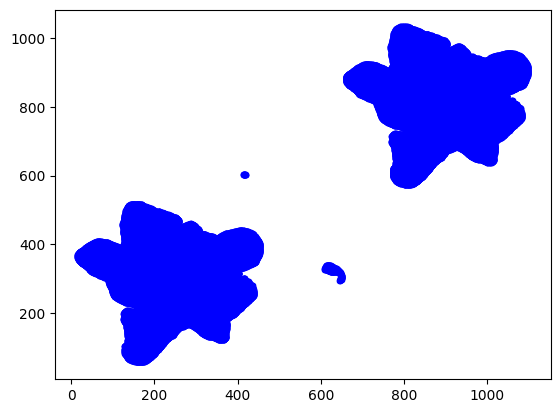

In [86]:
# white_points = np.array(np.mat('0 0; 0 0'))
# index = 0
# x = 0
# y = 0
# for row in denoised_image:
#     for element in row:
#         if(element == 255):
#             white_points = np.vstack([white_points, [x, y]])
#         x = x + 1
#     y = y + 1
#     x = 0
# white_points = np.delete(white_points, (0, 1), axis=0)
# print(white_points)

white_points = ch.binary_to_cartesian(denoised_image)

plt.figure(); plt.plot(white_points[:, 0], white_points[:, 1], "b."); plt.show()

In [5]:
white_points.shape

(222500, 2)

[0 1 2 3]


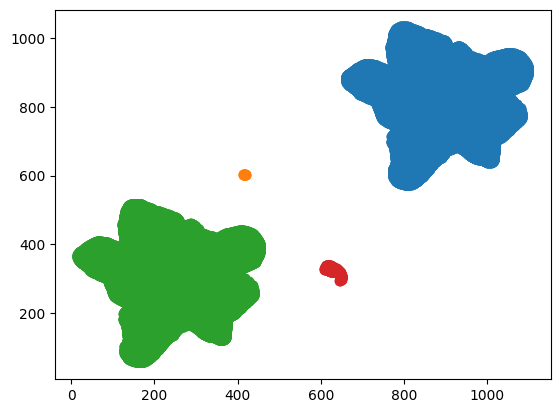

In [89]:
from numpy import unique
from numpy import where
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN

# define the model
dbscan_model = DBSCAN(eps=5, min_samples=10)

# train the model
dbscan_model.fit(white_points)

# assign each data point to a cluster
dbscan_result = dbscan_model.fit_predict(white_points)

# get all of the unique clusters
dbscan_clusters = unique(dbscan_result)
print(dbscan_clusters)

# plot the DBSCAN clusters
for dbscan_cluster in dbscan_clusters:
    # get data points that fall in this cluster
    index = where(dbscan_result == dbscan_cluster)
    # make the plot
    pyplot.scatter(white_points[index, 0], white_points[index, 1])

# show the DBSCAN plot
pyplot.show()

bluh


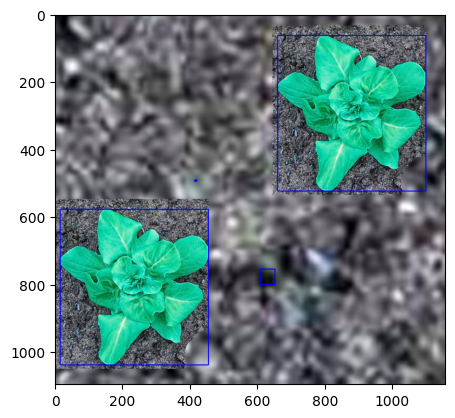

((659, 572), (1098, 1033)) ((413, 601), (420, 605)) ((15, 57), (454, 518))


In [90]:
# Find the bounding box for each cluster
bounding_boxes = ch.find_bounding_boxes(white_points, dbscan_result)

# Find the center of each cluster
cluster_centers = ch.find_cluster_centers(white_points, dbscan_result)

# Draw boxes and circles
img_processed = np.copy(image)
ch.plot_boxes(img_processed, bounding_boxes)
# ch.plot_centers(img_processed, cluster_centers)

plt.imshow(img_processed)
plt.show()

print(bounding_boxes[0], bounding_boxes[1], bounding_boxes[2])

(659, 572) (1098, 1033)
1033 - 1096


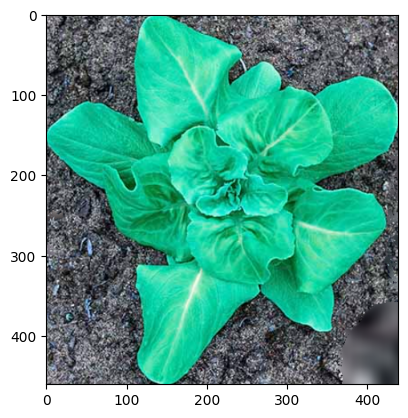

In [58]:
image = cv2.imread('../img/lettuce_test.png')
bounding_boxes[0]
segmented_img = ch.return_image_array(bounding_boxes[0], image)
segmented_img
plt.figure()
plt.imshow(segmented_img)
plt.show()

In [8]:
# # Plot each cluster of weed on a separate subplot with the size of the subplot corresponding to each box size
# num_clusters = len(bounding_boxes)
# num_cols = 6
# num_rows = -(-num_clusters // num_cols)

# plt.figure(figsize=(15, 5*num_rows))

# for i, box in enumerate(bounding_boxes, start=0):
#     (min_x, min_y), (max_x, max_y) = box
#     box_width = max_x - min_x
#     box_height = max_y - min_y
    
#     if box_width <= 0 or box_height <= 0:
#         continue
    
#     plt.subplot(num_rows, num_cols, i)
#     plt.imshow(image[min_y:max_y, min_x:max_x])
#     plt.axis('off')
#     plt.title(f'Cluster {i} - Size: {box_width} x {box_height}')

# plt.tight_layout()
# plt.show()

ValueError: num must be an integer with 1 <= num <= 6, not 0

<Figure size 1500x500 with 0 Axes>